In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
car = cv2.imread('DATA/car_plate.jpg')

In [6]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

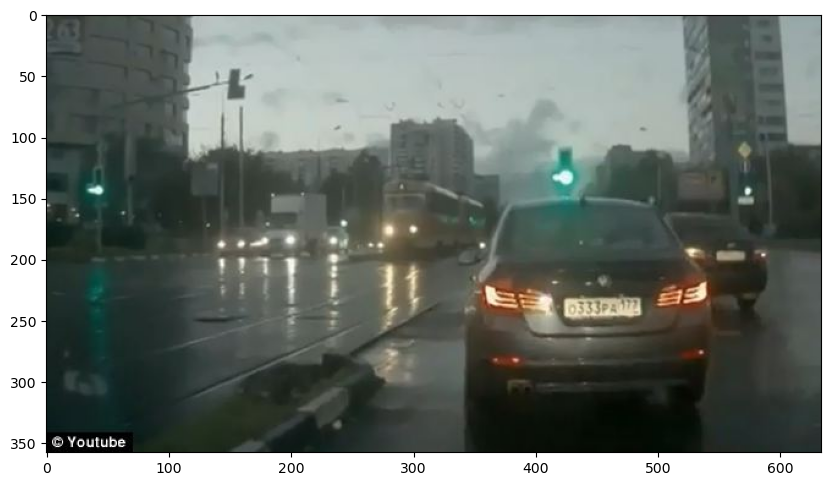

In [8]:
display(car)

In [10]:
car_detector = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_licence_plate_rus_16stages.xml')

In [12]:
def detect_plate(img):
    car_img = img.copy()
    res_img=car_detector.detectMultiScale(car_img)

    for (x,y,h,w) in res_img:
        cv2.rectangle(car_img, (x,y),(x+h,y+w),(255,0,0), 3)
    return car_img

In [14]:
plate = detect_plate(car)

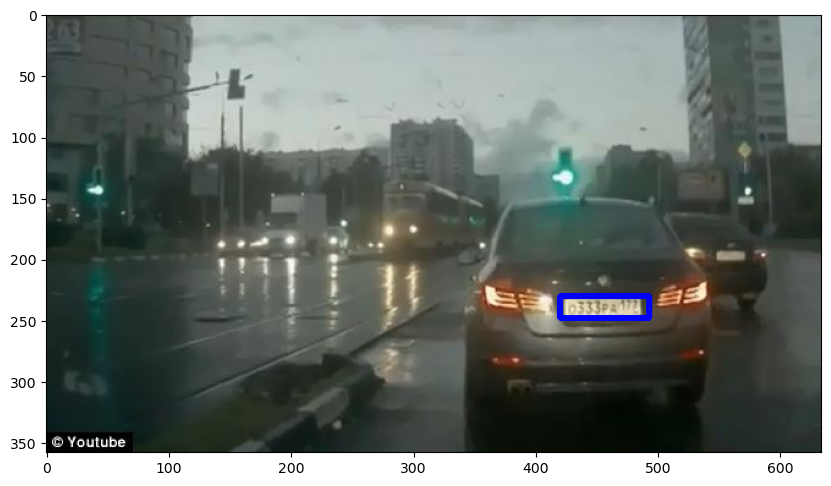

In [16]:
display(plate)

In [18]:
video = cv2.VideoCapture('DATA/car_plate_video.mp4') 

In [20]:
if not video.isOpened():
    print("Error: Could not open video file.")
    exit()

while True:
    ret, frame = video.read()
    if not ret:
        break  # Break the loop if no more frames are available
    
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect license plates in the frame
    plates = car_detector.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=4)
    
    # Draw rectangles around detected plates
    for (x, y, w, h) in plates:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    # Display the processed frame
    cv2.imshow('License Plate Detection', frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
video.release()
cv2.destroyAllWindows()

2025-03-14 22:42:49.403 python[4248:87779] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-14 22:42:49.403 python[4248:87779] +[IMKInputSession subclass]: chose IMKInputSession_Modern
